# I. Data Loading and Cleaning
***

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

## Dataset Description
A list of German loan applications for various reasons. There are 20 independent variables about the applicant and their loan history. There is a target class denoting if the application was accepted or rejected.

In [3]:
df = pd.read_csv('credit_data_track2_part_2_1.csv')
df.shape

(1000, 24)

In [4]:
df.head()

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,asnm,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted,gender
0,1,<0DM,6,Critical_acct_other_credits_existing,radio/television,1169.0,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,real_estate,35,193,none,own,2,skilled_employee/official,1,yes,yes,0,male
1,2,0_to_200DM,48,Existing_credits_paid_till_now,radio/television,5951.0,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,2,real_estate,22,424,none,own,1,skilled_employee/official,1,none,yes,1,female
2,3,None,12,Critical_acct_other_credits_existing,education,2096.0,<100DM,4_to_7yrs,2,male_single,None,3,real_estate,49,73,none,own,1,unskilled_resident,2,none,yes,0,male
3,4,<0DM,42,Existing_credits_paid_till_now,furniture/equipment,7882.0,<100DM,4_to_7yrs,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,33,none,for_free,1,skilled_employee/official,2,none,yes,0,male
4,5,<0DM,24,Delay_in_past,new_car,4870.0,<100DM,1_to_4yrs,3,male_single,None,4,unknown/no_property,53,145,none,for_free,2,skilled_employee/official,2,none,yes,1,male


In [5]:
# Given that the first column is redundant with the index, it can be dropped
df = df.drop(df.columns[0], axis=1)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,asnm,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted,gender
0,<0DM,6,Critical_acct_other_credits_existing,radio/television,1169.0,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,real_estate,35,193,none,own,2,skilled_employee/official,1,yes,yes,0,male
1,0_to_200DM,48,Existing_credits_paid_till_now,radio/television,5951.0,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,2,real_estate,22,424,none,own,1,skilled_employee/official,1,none,yes,1,female
2,None,12,Critical_acct_other_credits_existing,education,2096.0,<100DM,4_to_7yrs,2,male_single,None,3,real_estate,49,73,none,own,1,unskilled_resident,2,none,yes,0,male
3,<0DM,42,Existing_credits_paid_till_now,furniture/equipment,7882.0,<100DM,4_to_7yrs,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,33,none,for_free,1,skilled_employee/official,2,none,yes,0,male
4,<0DM,24,Delay_in_past,new_car,4870.0,<100DM,1_to_4yrs,3,male_single,None,4,unknown/no_property,53,145,none,for_free,2,skilled_employee/official,2,none,yes,1,male


In [6]:
# Checking for missing values
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             1
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
asnm                      0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
accepted                  0
gender                    0
dtype: int64

In [7]:
# Dropping the row with a missing value
df = df.dropna(axis=0)
df.shape

(999, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 23 columns):
checking_status           999 non-null object
duration                  999 non-null int64
credit_history            999 non-null object
purpose                   999 non-null object
credit_amount             999 non-null float64
savings_status            999 non-null object
employment                999 non-null object
installment_commitment    999 non-null int64
personal_status           999 non-null object
other_parties             999 non-null object
residence_since           999 non-null int64
property_magnitude        999 non-null object
age                       999 non-null int64
asnm                      999 non-null int64
other_payment_plans       999 non-null object
housing                   999 non-null object
existing_credits          999 non-null int64
job                       999 non-null object
num_dependents            999 non-null int64
own_telephone             9

## Variables

A. **Numeric**

1. Continuous
> - duration
> - credit_amount
> - age
> - asnm
> - num_dependents
2. Discrete
> - installment_commitment
> - residence_since
> - existing_credits
> - accepted

B. **Categorical**
1. Dichotomous
> - own_telephone
> - foreign_worker
> - gender
2. Others
> - checking_status
> - credit_history
> - purpose
> - savings_status
> - employment
> - personal_status
> - other_parties
> - property_magnitude
> - other_payment_plans
> - housing
> - job


# II. Exploratory Data Analysis and Data Visualization
***

In [12]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,asnm,existing_credits,num_dependents,accepted
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.911912,3273.236236,2.972973,2.846847,35.525526,193.821822,1.407407,1.155155,0.299299
std,12.061559,2823.457091,1.119275,1.102724,11.046227,157.074508,0.577800,0.362234,0.458180
min,4.000000,250.000000,1.000000,1.000000,19.000000,24.000000,1.000000,1.000000,0.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,60.000000,1.000000,1.000000,0.000000
50%,18.000000,2320.000000,3.000000,3.000000,34.000000,168.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.500000,4.000000,4.000000,41.000000,280.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,1113.000000,4.000000,2.000000,1.000000


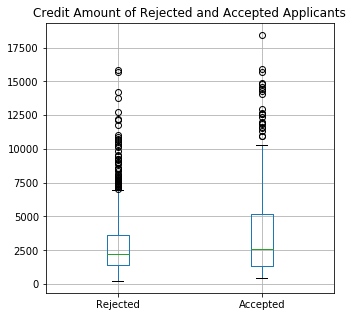

In [13]:
df.boxplot(by='accepted', column='credit_amount', figsize=(5,5))
plt.title('Credit Amount of Rejected and Accepted Applicants')
plt.suptitle('')
plt.xlabel('')
plt.xticks([1, 2], ['Rejected', 'Accepted'])
plt.show()

Based on the boxplot above, the range of the credit amounts of the accepted applicants is wider. It also shows that the mean and the upper quartile credit amounts of the accepted applicants are higher than the rejected applicants.

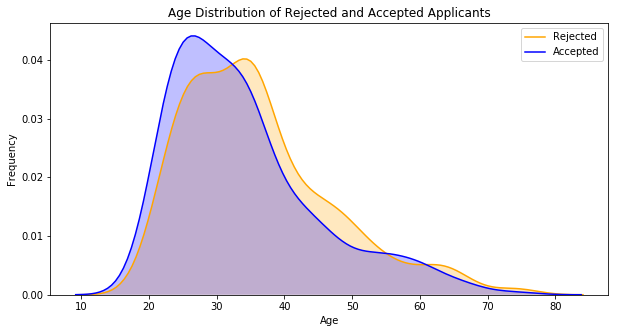

In [15]:
fig = plt.figure(figsize=(10,5),)
ax=sns.kdeplot(df.loc[(df['accepted'] == 0),'age'] , color='orange',shade=True,label='Rejected')
ax=sns.kdeplot(df.loc[(df['accepted'] == 1),'age'] , color='b',shade=True, label='Accepted')
plt.title('Age Distribution of Rejected and Accepted Applicants')
plt.xlabel("Age")
plt.ylabel('Frequency');

At first glance, the plot above shows that the difference of the age distribution of rejeceted and accepted applicants is not significant. However, we can see that the most common age in accepted applicants is lower than the most common age in the rejected applicants.

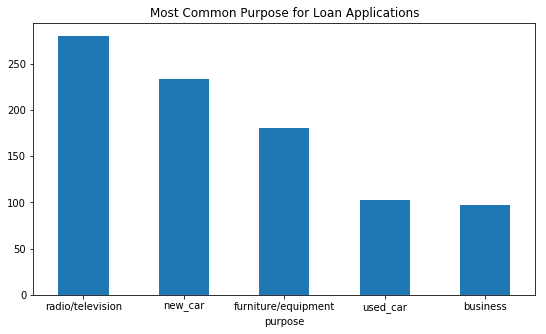

In [17]:
plt.figure(figsize=(9,5))
df.groupby('purpose')['purpose'].count().sort_values(ascending=False).head(5).plot.bar()
plt.xticks(rotation=0)
plt.title('Most Common Purpose for Loan Applications')
plt.show()

The bar plot above shows the top five purposes for the loan applications lead by **radio/television**. However, the most accepted loan applications are for the purposes of buying a **new car** as shown by the plot below.

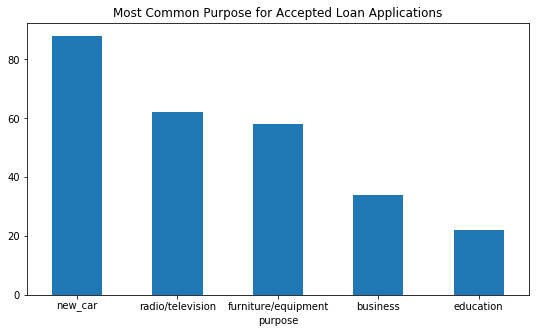

In [19]:
plt.figure(figsize=(9,5))
df.groupby('purpose')['accepted'].sum().sort_values(ascending=False).head(5).plot.bar()
plt.xticks(rotation=0)
plt.title('Most Common Purpose for Accepted Loan Applications')
plt.show()

# III. Hypothesis Testing 
***

## Correlations

In [22]:
# Changing all dichotomous variables into numeric
df['gender'] = df['gender'].replace('female', 1)
df['gender'] = df['gender'].replace('male', 0)
df['own_telephone'] = df['own_telephone'].replace('yes', 1)
df['own_telephone'] = df['own_telephone'].replace('none', 0)
df['foreign_worker'] = df['foreign_worker'].replace('yes', 1)
df['foreign_worker'] = df['foreign_worker'].replace('no', 0)

In [23]:
corr = df.corr()
corr['accepted'].sort_values(ascending=False)

accepted                  1.000000
duration                  0.216368
credit_amount             0.156030
foreign_worker            0.081877
asnm                      0.078737
gender                    0.073379
installment_commitment    0.072452
residence_since           0.005539
num_dependents           -0.002363
own_telephone            -0.035260
existing_credits         -0.044718
age                      -0.091492
Name: accepted, dtype: float64

Based on this, we will look at the relationship of **duration** and **credit_amount** with acceptance.

### Is there a significant difference in the duration of the loan between accepted and rejected applications?

* **Null Hypothesis**: There is no significant difference in the duration of the loan between accepted and rejected applications
* **Alternative Hypotehesis**: There is a significant difference in the duration of the loan between accepted and rejected applications

In [26]:
accepted_meanduration = df[df['accepted']==1]['duration'].mean()
rejected_meanduration = df[df['accepted']==0]['duration'].mean()
print("The mean loan duration of accepted applications is", round(accepted_meanduration, 2))
print("The mean loan duration of rejected applications is", round(rejected_meanduration, 2))
print("The difference between the two is", round(accepted_meanduration - rejected_meanduration,2))

The mean loan duration of accepted applications is 24.9
The mean loan duration of rejected applications is 19.21
The difference between the two is 5.7


In [27]:
accepted = np.array(df[df['accepted']==1]['duration'])
rejected = np.array(df[df['accepted']==0]['duration'])

In [28]:
# Performing t-test
stats.ttest_ind(accepted, rejected)

Ttest_indResult(statistic=6.9976465535346355, pvalue=4.7715527836052615e-12)

Since p_value is way below 0.05, we can rule out our null hypothesis and conclude that **"There is a significant difference in the duration of the loan between accepted and rejected applications."**

### Is there a significant difference in the mean credit amount of the applicant between accepted and rejected loan applications?

* **Null Hypothesis**: There is no significant difference in the mean credit amount of accepted and rejected applicants.
* **Alternative Hypotehesis**: There is a significant difference in the mean credit amount of accepted and rejected applicants.

In [31]:
accepted_meancredit = df[df['accepted']==1]['credit_amount'].mean()
rejected_meancredit = df[df['accepted']==0]['credit_amount'].mean()
print("The mean credit amount of accepted applicants is", round(accepted_meancredit, 2))
print("The mean credit amount of rejected applicants is", round(rejected_meancredit, 2))
print("The difference between the two is", round(accepted_meancredit - rejected_meancredit, 2))

The mean credit amount of accepted applicants is 3946.97
The mean credit amount of rejected applicants is 2985.46
The difference between the two is 961.51


In [32]:
accepted = np.array(df[df['accepted']==1]['credit_amount'])
rejected = np.array(df[df['accepted']==0]['credit_amount'])

In [33]:
# Performing t-test
stats.ttest_ind(accepted, rejected)

Ttest_indResult(statistic=4.987793794559396, pvalue=7.201398640637029e-07)

Since p_value is way below 0.05, we can rule out our null hypothesis and conclude that **"There is a significant difference in the mean credit amount of accepted and rejected applicants."**

# IV. Pre-Modelling
***

## Creating Dummy Variables

In [37]:
data = pd.get_dummies(df, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', \
                                    'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', \
                                    'housing', 'job'], drop_first=False)

In [38]:
data.head()

,duration,credit_amount,installment_commitment,residence_since,age,asnm,existing_credits,num_dependents,own_telephone,foreign_worker,accepted,gender,checking_status_0_to_200DM,checking_status_<0DM,checking_status_>200DM,checking_status_None,credit_history_All_credits_paid_duly,credit_history_Critical_acct_other_credits_existing,credit_history_Delay_in_past,credit_history_Existing_credits_paid_till_now,credit_history_No_credits_taken_or_all_paid,purpose_business,purpose_domestic_appliances,purpose_education,purpose_furniture/equipment,purpose_new_car,purpose_other,purpose_radio/television,purpose_repairs,purpose_retraining,purpose_used_car,savings_status_100_to_500DM,savings_status_500_to_1000DM,savings_status_<100DM,savings_status_>1000DM,savings_status_Unknown_or_no_savings_acct,employment_1_to_4yrs,employment_4_to_7yrs,employment_<1yr,employment_>7yrs,employment_unemployed,personal_status_female_divorced/separated/married,personal_status_male_divorced/separated,personal_status_male_married/widowed,personal_status_male_single,other_parties_None,other_parties_co-applicant,other_parties_guarantor,property_magnitude_building_society_savings_agreement/life_insurance,property_magnitude_car_or_other_nonsavings,property_magnitude_real_estate,property_magnitude_unknown/no_property,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for_free,housing_own,housing_rent,job_management_self-employed_highly_qualified/officer,job_skilled_employee/official,job_unemployed/unskilled_nonresident,job_unskilled_resident
0,6,1169.0,4,4,35,193,2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,48,5951.0,2,2,22,424,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,12,2096.0,2,3,49,73,1,2,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,42,7882.0,2,4,45,33,1,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4,24,4870.0,3,4,53,145,2,2,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0


## Train Test Split

In [40]:
X = data.drop(['accepted'], axis = 1).astype(float)
y = data['accepted'].astype(float)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)

## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pd.DataFrame(X_train, columns=X.columns).head()

,duration,credit_amount,installment_commitment,residence_since,age,asnm,existing_credits,num_dependents,own_telephone,foreign_worker,gender,checking_status_0_to_200DM,checking_status_<0DM,checking_status_>200DM,checking_status_None,credit_history_All_credits_paid_duly,credit_history_Critical_acct_other_credits_existing,credit_history_Delay_in_past,credit_history_Existing_credits_paid_till_now,credit_history_No_credits_taken_or_all_paid,purpose_business,purpose_domestic_appliances,purpose_education,purpose_furniture/equipment,purpose_new_car,purpose_other,purpose_radio/television,purpose_repairs,purpose_retraining,purpose_used_car,savings_status_100_to_500DM,savings_status_500_to_1000DM,savings_status_<100DM,savings_status_>1000DM,savings_status_Unknown_or_no_savings_acct,employment_1_to_4yrs,employment_4_to_7yrs,employment_<1yr,employment_>7yrs,employment_unemployed,personal_status_female_divorced/separated/married,personal_status_male_divorced/separated,personal_status_male_married/widowed,personal_status_male_single,other_parties_None,other_parties_co-applicant,other_parties_guarantor,property_magnitude_building_society_savings_agreement/life_insurance,property_magnitude_car_or_other_nonsavings,property_magnitude_real_estate,property_magnitude_unknown/no_property,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for_free,housing_own,housing_rent,job_management_self-employed_highly_qualified/officer,job_skilled_employee/official,job_unemployed/unskilled_nonresident,job_unskilled_resident
0,-0.902474,-0.390403,-1.782434,0.116839,-1.217602,1.465214,1.036024,-0.439576,-0.800685,0.19061,1.519668,-0.616591,-0.588275,-0.274598,1.231587,-0.237566,1.595111,-0.330544,-1.042645,-0.217262,-0.305067,-0.100588,-0.233618,2.194432,-0.565140,-0.091747,-0.652833,-0.136775,-0.091747,-0.342837,-0.339789,-0.263899,0.85511,-0.237566,-0.500522,-0.710651,-0.487446,2.378141,-0.598562,-0.249112,1.519668,-0.241462,-0.271066,-1.161473,0.311560,-0.199826,-0.229617,-0.541975,-0.732050,1.692488,-0.444972,-0.417744,0.503128,-0.237566,-0.360817,-1.556553,2.156605,-0.40944,0.740138,-0.123508,-0.492685
1,1.261519,-0.337004,0.911455,1.037715,0.301864,-1.053969,-0.702291,-0.439576,-0.800685,0.19061,-0.658038,-0.616591,-0.588275,-0.274598,1.231587,-0.237566,-0.626916,-0.330544,0.959099,-0.217262,-0.305067,-0.100588,-0.233618,-0.455699,-0.565140,-0.091747,1.531786,-0.136775,-0.091747,-0.342837,-0.339789,3.789324,-1.16944,-0.237566,-0.500522,-0.710651,-0.487446,-0.420496,1.670670,-0.249112,-0.658038,-0.241462,-0.271066,0.860976,0.311560,-0.199826,-0.229617,-0.541975,1.366027,-0.590846,-0.444972,-0.417744,0.503128,-0.237566,-0.360817,0.642445,-0.463692,-0.40944,0.740138,-0.123508,-0.492685
2,0.262753,-0.599813,0.911455,1.037715,-1.122635,1.200414,-0.702291,-0.439576,-0.800685,0.19061,-0.658038,-0.616591,1.699885,-0.274598,-0.811960,4.209365,-0.626916,-0.330544,-1.042645,-0.217262,-0.305067,-0.100588,-0.233618,-0.455699,-0.565140,-0.091747,1.531786,-0.136775,-0.091747,-0.342837,-0.339789,-0.263899,0.85511,-0.237566,-0.500522,-0.710651,2.051511,-0.420496,-0.598562,-0.249112,-0.658038,-0.241462,-0.271066,0.860976,-3.209655,-0.199826,4.355074,-0.541975,1.366027,-0.590846,-0.444972,2.393812,-1.987565,-0.237566,-0.360817,-1.556553,2.156605,-0.40944,-1.351100,-0.123508,2.029694
3,0.262753,-0.453575,0.911455,1.037715,0.586764,-1.118380,1.036024,-0.439576,1.248931,0.19061,1.519668,1.621821,-0.588275,-0.274598,-0.811960,-0.237566,-0.626916,3.025317,-1.042645,-0.217262,-0.305067,-0.100588,-0.233618,-0.455699,1.769473,-0.091747,-0.652833,-0.136775,-0.091747,-0.342837,-0.339789,-0.263899,-1.16944,-0.237566,1.997916,1.407160,-0.487446,-0.420496,-0.598562,-0.249112,1.519668,-0.241462,-0.271066,-1.161473,0.311560,-0.199826,-0.229617,-0.541975,1.366027,-0.590846,-0.444972,-0.417744,0.503128,-0.237566,-0.360817,-1.556553,2.156605,-0.40944,0.740138,-0.123508,-0.492685
4,-0.486322,-0.027426,-0.884471,0.116839,-1.502502,2.345497,-0.702291,-0.439576,-0

# V. Modelling
***

We will create a model to predict the acceptance of an application based on all the variables provided.

First, let's visualize the class histogram.

Text(0, 0.5, 'Frequency')

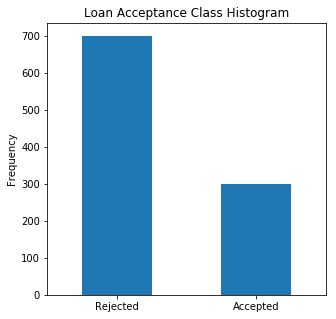

In [46]:
count_acceptance = pd.value_counts(df['accepted'], sort = True).sort_index()
count_acceptance.plot(kind = 'bar', figsize=(5,5))
plt.title("Loan Acceptance Class Histogram")
plt.xticks([0, 1], ['Rejected', 'Accepted'])
plt.xticks(rotation=0)
plt.ylabel("Frequency")

There is a little imbalance, as expected, between the two classes. 

## Choosing the Best Estimator
Since this is a classification problem, we will choose the best model among
1. Logistic Regression
2. Random Forest Classifier
3. KNN Classifier
3. XGBoost Classifier

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
from sklearn.metrics import roc_curve, auc
y_score = lr.decision_function(X_test)

y_pred = lr.predict(X_test)
print ("The accuracy score is:", round(accuracy_score(y_pred, y_test),4))
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print ("The ROC_AUC score is:", round(ROC_AUC,4))

The accuracy score is: 0.76
The ROC_AUC score is: 0.7698


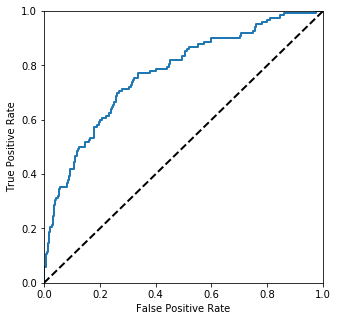

In [51]:
plt.figure(figsize =[5, 5])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/Users/raei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_pred = rf.predict(X_test)
print ("The accuracy score is: ", round(accuracy_score(y_pred, y_test),4))

y_score = rf.predict_proba(X_test)[:,1]
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print ("The ROC_AUC score is:", round(ROC_AUC,4))

The accuracy score is:  0.715
The ROC_AUC score is: 0.7318


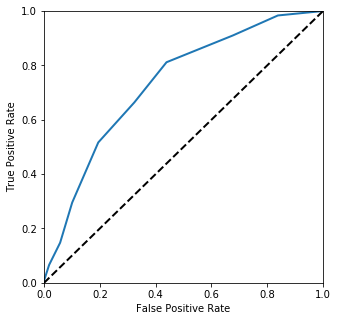

In [55]:
plt.figure(figsize =[5, 5])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])ki
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### KNN Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
y_pred = knn.predict(X_test)
print ("The accuracy score is:", round(accuracy_score(y_pred, y_test),4))

y_score = knn.predict_proba(X_test)[:,1]
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print ("The ROC_AUC score is:", round(ROC_AUC,4))

The accuracy score is: 0.735
The ROC_AUC score is: 0.6996


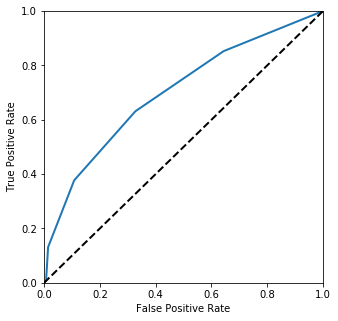

In [59]:
plt.figure(figsize =[5, 5])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### XGBoost Classifier

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [62]:
y_pred = xgb.predict(X_test)
print ("The accuracy score is:", round(accuracy_score(y_pred, y_test),4))

y_score = xgb.predict_proba(X_test)[:,1]
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print ("The ROC_AUC score is:", round(ROC_AUC,4))

The accuracy score is: 0.7575
The ROC_AUC score is: 0.77


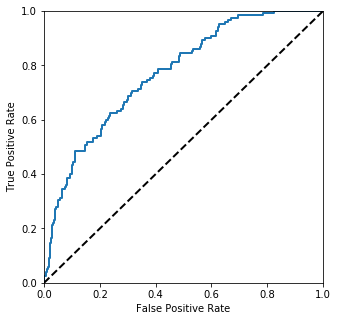

In [63]:
plt.figure(figsize =[5, 5])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[250,  28],
       [ 69,  53]])

## Hypertuning the Parameters

Based on the accuracy and ROC_AUC scores, the best model is **XGBoost Classifer**. 
> The accuracy score is: 0.7575 <br>
The ROC_AUC score is: 0.77

To further improve the model, we will search for the best parameters using Randomized Search Cross Validation.

In [67]:
parameter_candidates = {
        'min_child_weight': [1, 5, 10],
        'colsample_bytree': [0.2, 0.5, 1.0],
        'max_depth': [3, 4, 5],
        'sub_sample': [1, 2]
        }

In [68]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
search = GridSearchCV(estimator=xgb, param_grid=parameter_candidates, \
                            cv=5, scoring='roc_auc', iid=True)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'min_child_weight': [1, 5, 10], 'colsample_bytree': [0.2, 0.5, 1.0], 'max_depth': [3, 4, 5], 'sub_sample': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [69]:
search.best_params_

{'colsample_bytree': 0.2,
 'max_depth': 3,
 'min_child_weight': 1,
 'sub_sample': 1}

In [70]:
xgb_ = search.best_estimator_

In [71]:
y_pred = xgb_.predict(X_test)
print ("The accuracy score is:", round(accuracy_score(y_pred, y_test),4))

y_score = xgb_.predict_proba(X_test)[:,1]
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print ("The ROC_AUC score is:", round(ROC_AUC,4))

The accuracy score is: 0.7525
The ROC_AUC score is: 0.7731


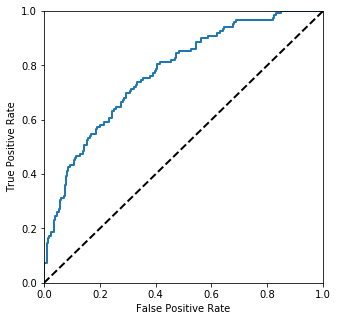

In [72]:
plt.figure(figsize =[5, 5])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 2)
plt.plot([0,1],[0,1], 'k--', linewidth = 2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [73]:
confusion_matrix(y_test, y_pred)

array([[248,  30],
       [ 69,  53]])

There is little improvement and the ROC_AUC score while the accuracy score decreased. Further hypertuning may be required for a better model or we can stick with the default parameters.

## Feature Importances

In [76]:
feature_importances = pd.DataFrame(xgb_.feature_importances_,
                                   index = X.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
checking_status_<0DM,0.071036
checking_status_None,0.066027
credit_history_Critical_acct_other_credits_existing,0.041791
housing_own,0.037214
credit_history_Existing_credits_paid_till_now,0.033357
other_payment_plans_bank,0.026905
duration,0.025476
credit_history_No_credits_taken_or_all_paid,0.023196
purpose_used_car,0.023150
savings_status_<100DM,0.023101


# Conclusion
***

Based on the analysis, the most important factors considered whether a loan application is accepted or not are checking status, credit history, and housing. An XGBoost Classifier model can be used to predict the probability of a loan application to get accepted or not.